In [1]:
%config IPCompleter.greedy=True # TAB键代码自动提示

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
from tensorflow import keras
import numpy as np

model=keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer='sgd',loss='mean_squared_error')

xs=np.array([-1.0,0.0,1.0,2.0,3.0,4.0],dtype=float)
ys=np.array([-3.0,-1.0,1.0,3.0,5.0,7.0],dtype=float)

model.fit(xs,ys,epochs=500)

Train on 6 samples
Epoch 1/500
6/6 [==============================] - 1s 139ms/sample - loss: 12.2847
Epoch 2/500
6/6 [==============================] - 0s 493us/sample - loss: 9.8898
Epoch 3/500
6/6 [==============================] - 0s 486us/sample - loss: 8.0010
Epoch 4/500
6/6 [==============================] - 0s 466us/sample - loss: 6.5104
Epoch 5/500
6/6 [==============================] - 0s 434us/sample - loss: 5.3333
Epoch 6/500
6/6 [==============================] - 0s 809us/sample - loss: 4.4028
Epoch 7/500
6/6 [==============================] - 0s 2ms/sample - loss: 3.6665
Epoch 8/500
6/6 [==============================] - 0s 914us/sample - loss: 3.0831
Epoch 9/500
6/6 [==============================] - 0s 743us/sample - loss: 2.6200
Epoch 10/500
6/6 [==============================] - 0s 899us/sample - loss: 2.2517
Epoch 11/500
6/6 [==============================] - 0s 2ms/sample - loss: 1.9580
Epoch 12/500
6/6 [==============================] - 0s 2ms/sample - loss: 1.7231

In [4]:
model.predict([10.0])

array([[18.982235]], dtype=float32)

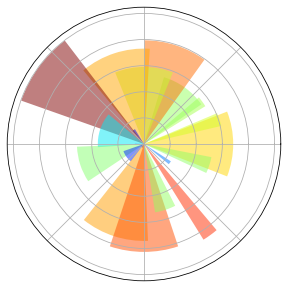

In [5]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes([0.025,0.025,0.95,0.95], polar=True)

N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor( plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

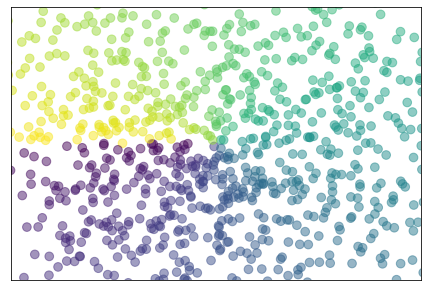

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)

plt.axes([0.025,0.025,0.95,0.95])
plt.scatter(X,Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5,1.5), plt.xticks([])
plt.ylim(-1.5,1.5), plt.yticks([])
# savefig('../figures/scatter_ex.png',dpi=48)
plt.show()


------
# 以下进入正题
------

In [7]:
import pandas as pd
S2F = pd.read_csv('BTC-S2F.csv')
NVT = pd.read_csv('BTC-NVT.csv')
MVRV = pd.read_csv('BTC-MVRV.csv')
print(S2F.shape)
print(NVT.shape)
print(MVRV.shape)

(3982, 6)
(3875, 5)
(3981, 5)


In [8]:
print(S2F.columns)

Index(['时间', '币价', 'S2F(月)', 'S2F(年)', '预期价格(月)', '预期价格(年)'], dtype='object')


In [9]:
print(NVT.columns)

Index(['时间', '币价', 'NVT', 'NVTS', 'SMA60'], dtype='object')


In [10]:
print(MVRV.columns)

Index(['时间', '币价', 'MVRV', '辅助线', 'SMA60'], dtype='object')


In [11]:
print(S2F.head())

               时间      币价    S2F(月)    S2F(年)   预期价格(月)   预期价格(年)
0  2010/8/16 0:00  0.0655  0.759903  1.025398  0.175523  0.195532
1  2010/8/17 0:00  0.0700  0.767184  1.025663  0.180617  0.195698
2  2010/8/18 0:00  0.0680  0.774364  1.025790  0.185736  0.195779
3  2010/8/19 0:00  0.0667  0.782338  1.026069  0.191533  0.195954
4  2010/8/20 0:00  0.0655  0.786949  1.026394  0.194939  0.196159


In [12]:
print(NVT.head())

               时间      币价       NVT       NVTS  SMA60
0  2010/12/1 0:00  0.2275   73.6973  undefined    NaN
1  2010/12/2 0:00  0.2550   67.3531  undefined    NaN
2  2010/12/3 0:00  0.2511  128.7577  undefined    NaN
3  2010/12/4 0:00  0.2050   62.3520  undefined    NaN
4  2010/12/5 0:00  0.1900  143.5623  undefined    NaN


In [13]:
print(MVRV.head())

               时间      币价      MVRV  辅助线  SMA60
0  2010/8/16 0:00  0.0655  7.138375    1    NaN
1  2010/8/17 0:00  0.0700  7.509859    1    NaN
2  2010/8/18 0:00  0.0680  7.147964    1    NaN
3  2010/8/19 0:00  0.0667  6.931684    1    NaN
4  2010/8/20 0:00  0.0655  6.694129    1    NaN


In [14]:
print(S2F.head(3))

               时间      币价    S2F(月)    S2F(年)   预期价格(月)   预期价格(年)
0  2010/8/16 0:00  0.0655  0.759903  1.025398  0.175523  0.195532
1  2010/8/17 0:00  0.0700  0.767184  1.025663  0.180617  0.195698
2  2010/8/18 0:00  0.0680  0.774364  1.025790  0.185736  0.195779


In [15]:
print(S2F.tail(3))

                  时间           币价     S2F(月)     S2F(年)      预期价格(月)  \
3979   2021/7/8 0:00  32930.19737  70.588537  54.771967  140689.7735   
3980   2021/7/9 0:00  33641.50878  70.486683  54.809374  140081.6368   
3981  2021/7/10 0:00  33892.21184  69.599441  54.812481  134858.1623   

          预期价格(年)  
3979  98291.28871  
3980  98512.98463  
3981  98531.41324  


In [16]:
MVRV.to_excel('MVRV.xlsx')
print('Done!')

Done!
